A: Create a dataset for regression by sampling 20 points $x\sim{} ~N(0,I), x\in \mathbb{R}^2$ and sample labels $y$ according to the distribution $p(y|x)=\mathcal{N}(y; x^T \theta, 0.1), \theta=[-1,1]^T$


In [8]:
import numpy as np

dim = 2
size = 20
means = np.zeros(dim)
Sig_x = np.eye(dim)
x = np.random.multivariate_normal(mean=means, cov=Sig_x, size=size)


In [9]:
theta = np.array([-1,1])

xt_theta = x @ theta

y = np.random.normal(xt_theta,np.sqrt(0.1)) #np random.normal takes std and not var, hence sqrt

We need to find the posterior distribution of the parameters of the model. The parameters are $\theta$, hence the posterior distribution is $p(\theta \mid x, y)$

To obtain this, we first need to compute $p(y,\theta \mid x)$, which is the joint distribution of $p(y \mid \theta, x)$ and $p(\theta)$

As per the lecture notes section 4.2, we can here look up the property for the joint distribution from two dependent normal distributions (eq. 31) (that is $p(y \mid \theta, x)$ and $p(\theta)$)


$
\begin{align}
\begin{bmatrix}
\theta \\
y
\end{bmatrix}
\sim \mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix},
\begin{bmatrix}
\Sigma_\theta & \Sigma_\theta X^T \\
X \Sigma_\theta & \sigma_y^2 I_N + X \Sigma_\theta X^T
\end{bmatrix}
\right)
\end{align}
$

And conditioning the joint distribution, $p(\theta, y \mid x)$ on $y$ via equation 29 gives mean and variance of the posterior distribution of $\theta$ as:

$
\begin{align}
\mu_{\theta \mid \mathcal{D}} = \Sigma_\theta X^T \left(\sigma_y^2 I_N + X \Sigma_\theta X^T\right)^{-1} y
\end{align}
$

$
\begin{align}
\Sigma_{\theta \mid \mathcal{D}} = \Sigma_\theta - \Sigma_\theta X^T \left(\sigma_y^2 I_N + X \Sigma_\theta X^T\right)^{-1} X \Sigma_\theta
\end{align}
$





In [10]:
sig2y = 0.1

Sigma_theta_prior = np.eye(2)
mean_theta_prior = np.zeros(2)


Sig_x_t = Sigma_theta_prior@x.T
x_Sig_x_t = x @ Sig_x_t
sig2y_x_Sig_x_t = sig2y*np.eye(size) + x_Sig_x_t
sig2y_x_Sig_x_t_inv = np.linalg.inv(sig2y_x_Sig_x_t)

# Posterior mean
mu_theta_post = Sig_x_t @ sig2y_x_Sig_x_t_inv @ y

#Posterior Covariance
Sigma_theta_post = Sigma_theta_prior - Sig_x_t @ sig2y_x_Sig_x_t_inv @ x @ Sigma_theta_prior

print(mu_theta_post,Sigma_theta_post)


[-1.07293875  1.00995943] [[ 0.00619172 -0.00049361]
 [-0.00049361  0.00479431]]


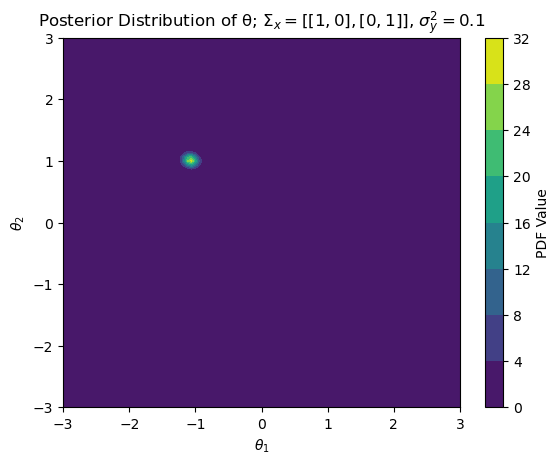

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


# Define grid for theta_1 and theta_2
theta1 = np.linspace(-3, 3, 100)
theta2 = np.linspace(-3, 3, 100)
theta1, theta2 = np.meshgrid(theta1, theta2)
pos = np.dstack((theta1, theta2))

# Evaluate posterior PDF
rv = multivariate_normal(mean=mu_theta_post, cov=Sigma_theta_post)
pdf = rv.pdf(pos)

# Plot the PDF
plt.contourf(theta1, theta2, pdf, cmap="viridis")
plt.colorbar(label="PDF Value")
plt.title("Posterior Distribution of θ; $\\Sigma_x = [[1, 0], [0, 1]]$, $\\sigma_y^2 = 0.1 $")
plt.xlabel("$\\theta_1$")
plt.ylabel("$\\theta_2$")
plt.savefig("figures/PML1_1-1_01_post_dist.png", dpi = 400)
plt.show()

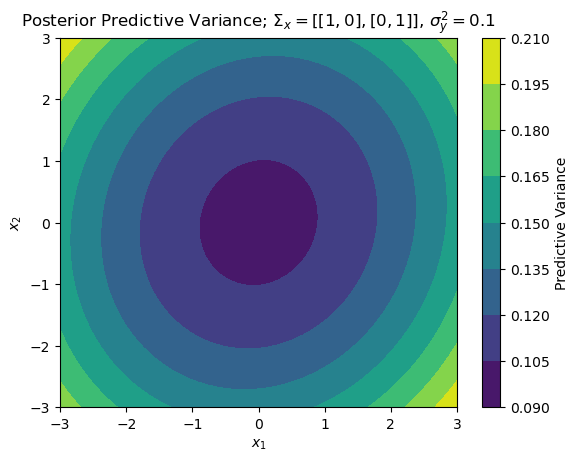

In [13]:
x1 = np.linspace(-3, 3, 50)
x2 = np.linspace(-3, 3, 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]  # Flatten the grid

# Compute predictive variance for each point
predictive_variance = []
for x in grid_points:
    x = x.reshape(-1, 1)  # Make it a column vector
    # Predictive variance: sigma_y^2 + x^T Sigma_theta_post x
    var = sig2y + x.T @ Sigma_theta_post @ x
    predictive_variance.append(var.item())  # Convert single value array to scalar

# Reshape predictive variance to match grid
predictive_variance = np.array(predictive_variance).reshape(x1_grid.shape)

# Plot predictive variance
plt.contourf(x1_grid, x2_grid, predictive_variance, cmap="viridis")
plt.colorbar(label="Predictive Variance")
plt.title("Posterior Predictive Variance; $\\Sigma_x = [[1, 0], [0, 1]]$, $\\sigma_y^2 = 0.1 $")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig("figures/PML1_1-1_01_pred_dist.png", dpi = 400)
plt.show()

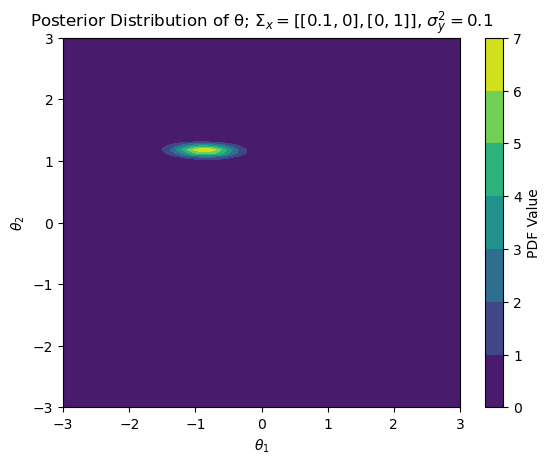

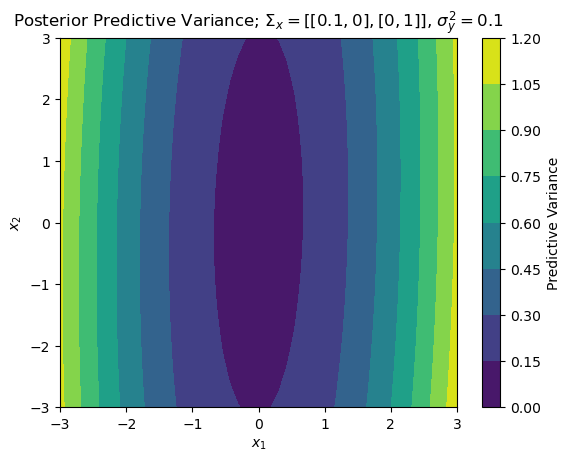

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

dim = 2
size = 20

means = np.zeros(dim)
Sig_x = np.eye(dim)
Sig_x[0,0] = 0.1

x = np.random.multivariate_normal(mean=means, cov=Sig_x, size=size)

theta = np.array([-1,1])

xt_theta = x @ theta

y = np.random.normal(xt_theta,np.sqrt(0.1)) #np random.normal takes std and not var, hence sqrt

sig2y = 0.1

Sigma_theta_prior = np.eye(2)
mean_theta_prior = np.zeros(2)


Sig_x_t = Sigma_theta_prior@x.T
x_Sig_x_t = x @ Sig_x_t
sig2y_x_Sig_x_t = sig2y*np.eye(size) + x_Sig_x_t
sig2y_x_Sig_x_t_inv = np.linalg.inv(sig2y_x_Sig_x_t)

# Posterior mean
mu_theta_post = Sig_x_t @ sig2y_x_Sig_x_t_inv @ y

#Posterior Covariance
Sigma_theta_post = Sigma_theta_prior - Sig_x_t @ sig2y_x_Sig_x_t_inv @ x @ Sigma_theta_prior

# Define grid for theta_1 and theta_2
theta1 = np.linspace(-3, 3, 100)
theta2 = np.linspace(-3, 3, 100)
theta1, theta2 = np.meshgrid(theta1, theta2)
pos = np.dstack((theta1, theta2))

# Evaluate posterior PDF
rv = multivariate_normal(mean=mu_theta_post, cov=Sigma_theta_post)
pdf = rv.pdf(pos)

# Plot the PDF
plt.contourf(theta1, theta2, pdf, cmap="viridis")
plt.colorbar(label="PDF Value")
plt.title("Posterior Distribution of θ; $\\Sigma_x = [[0.1, 0], [0, 1]]$, $\\sigma_y^2 = 0.1 $")
plt.xlabel("$\\theta_1$")
plt.ylabel("$\\theta_2$")
plt.savefig("figures/PML1_01-1_01_post_dist.png", dpi = 400)
plt.show()


x1 = np.linspace(-3, 3, 50)
x2 = np.linspace(-3, 3, 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]  # Flatten the grid

# Compute predictive variance for each point
predictive_variance = []
for x in grid_points:
    x = x.reshape(-1, 1)  # Make it a column vector
    # Predictive variance: sigma_y^2 + x^T Sigma_theta_post x
    var = sig2y + x.T @ Sigma_theta_post @ x
    predictive_variance.append(var.item())  # Convert single value array to scalar

# Reshape predictive variance to match grid
predictive_variance = np.array(predictive_variance).reshape(x1_grid.shape)

# Plot predictive variance
plt.contourf(x1_grid, x2_grid, predictive_variance, cmap="viridis")
plt.colorbar(label="Predictive Variance")
plt.title("Posterior Predictive Variance; $\\Sigma_x = [[0.1, 0], [0, 1]]$, $\\sigma_y^2 = 0.1 $")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig("figures/PML1_01-1_01_pred_dist.png", dpi = 400)
plt.show()


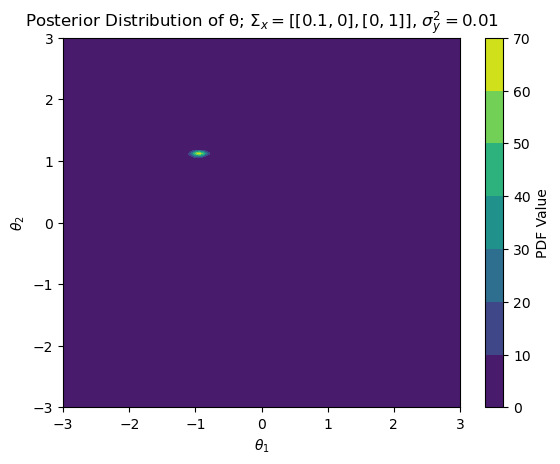

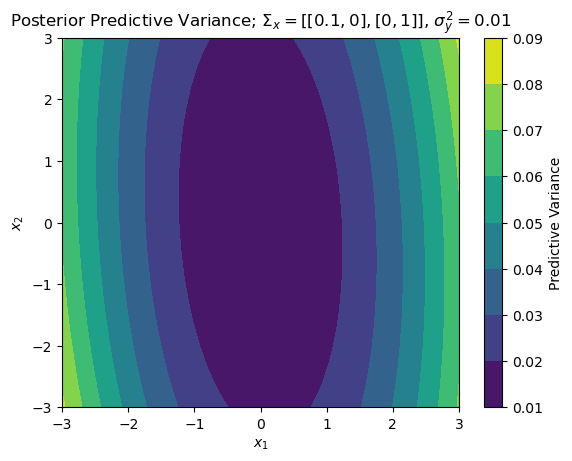

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

dim = 2
size = 20

means = np.zeros(dim)
Sig_x = np.eye(dim)
Sig_x[0,0] = 0.1

x = np.random.multivariate_normal(mean=means, cov=Sig_x, size=size)

theta = np.array([-1,1])

xt_theta = x @ theta

y = np.random.normal(xt_theta,np.sqrt(0.1)) #np random.normal takes std and not var, hence sqrt

sig2y = 0.01

Sigma_theta_prior = np.eye(2)
mean_theta_prior = np.zeros(2)


Sig_x_t = Sigma_theta_prior@x.T
x_Sig_x_t = x @ Sig_x_t
sig2y_x_Sig_x_t = sig2y*np.eye(size) + x_Sig_x_t
sig2y_x_Sig_x_t_inv = np.linalg.inv(sig2y_x_Sig_x_t)

# Posterior mean
mu_theta_post = Sig_x_t @ sig2y_x_Sig_x_t_inv @ y

#Posterior Covariance
Sigma_theta_post = Sigma_theta_prior - Sig_x_t @ sig2y_x_Sig_x_t_inv @ x @ Sigma_theta_prior

# Define grid for theta_1 and theta_2
theta1 = np.linspace(-3, 3, 100)
theta2 = np.linspace(-3, 3, 100)
theta1, theta2 = np.meshgrid(theta1, theta2)
pos = np.dstack((theta1, theta2))

# Evaluate posterior PDF
rv = multivariate_normal(mean=mu_theta_post, cov=Sigma_theta_post)
pdf = rv.pdf(pos)

# Plot the PDF
plt.contourf(theta1, theta2, pdf, cmap="viridis")
plt.colorbar(label="PDF Value")
plt.title("Posterior Distribution of θ; $\\Sigma_x = [[0.1, 0], [0, 1]]$, $\\sigma_y^2 = 0.01 $")
plt.xlabel("$\\theta_1$")
plt.ylabel("$\\theta_2$")
plt.savefig("figures/PML1_01-1_001_post_dist.png", dpi = 400)
plt.show()


x1 = np.linspace(-3, 3, 50)
x2 = np.linspace(-3, 3, 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]  # Flatten the grid

# Compute predictive variance for each point
predictive_variance = []
for x in grid_points:
    x = x.reshape(-1, 1)  # Make it a column vector
    # Predictive variance: sigma_y^2 + x^T Sigma_theta_post x
    var = sig2y + x.T @ Sigma_theta_post @ x
    predictive_variance.append(var.item())  # Convert single value array to scalar

# Reshape predictive variance to match grid
predictive_variance = np.array(predictive_variance).reshape(x1_grid.shape)

# Plot predictive variance
plt.contourf(x1_grid, x2_grid, predictive_variance, cmap="viridis")
plt.colorbar(label="Predictive Variance")
plt.title("Posterior Predictive Variance; $\\Sigma_x = [[0.1, 0], [0, 1]]$, $\\sigma_y^2 = 0.01 $")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig("figures/PML1_01-1_001_pred_dist.png", dpi = 400)
plt.show()
